LOGISTIC REGRESSION : ASSIGNMENT 1

Reading and uploading files

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [3]:
df = pd.read_csv(list(uploaded.keys())[0])

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Q1. EDA to figure out which variables have direct and clear impact on employee retention



left
0    11428
1     3571
Name: count, dtype: int64


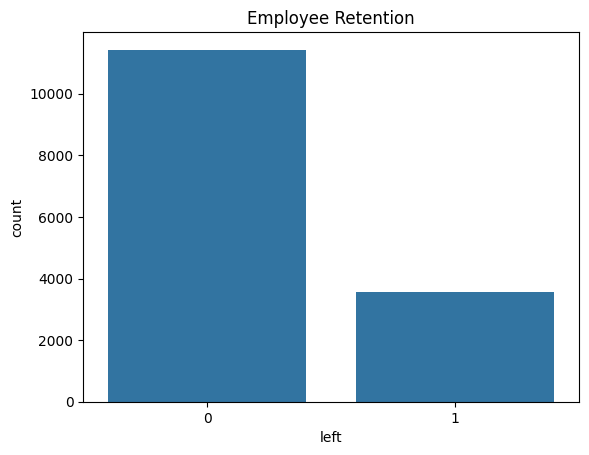

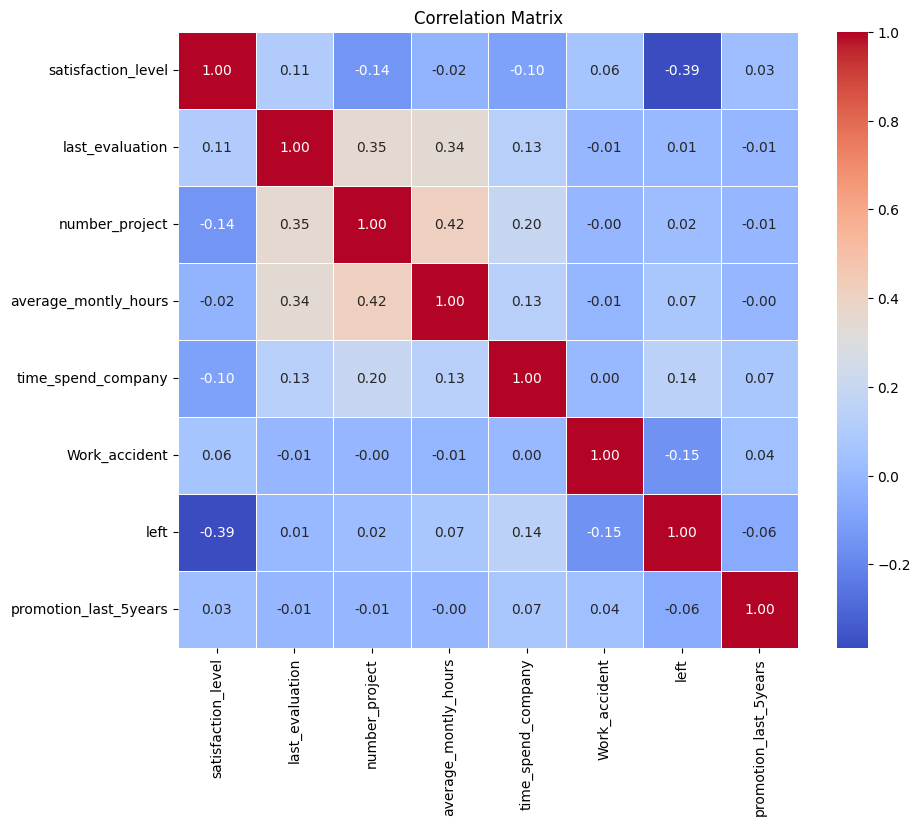

In [5]:
import seaborn as sns

# Retention analysis
print(df['left'].value_counts())  # 1: Left, 0: Stayed
sns.countplot(x='left', data=df)
plt.title("Employee Retention")
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Q2. Plotting bar charts showing empact of employee salaries on retention

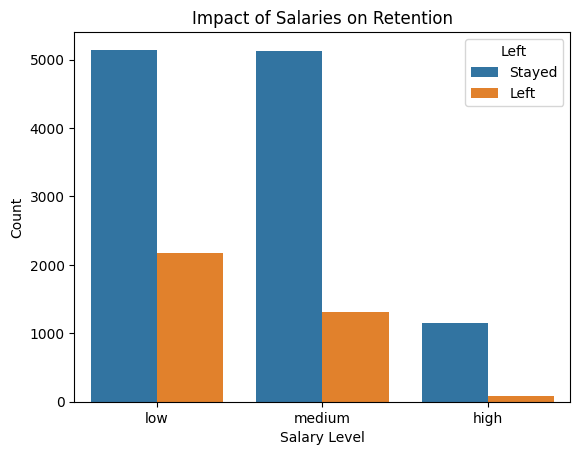

In [6]:
# Salary vs Retention
sns.countplot(x='salary', hue='left', data=df)
plt.title("Impact of Salaries on Retention")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

Q3. Plotting bar charts showing empact of department on retention

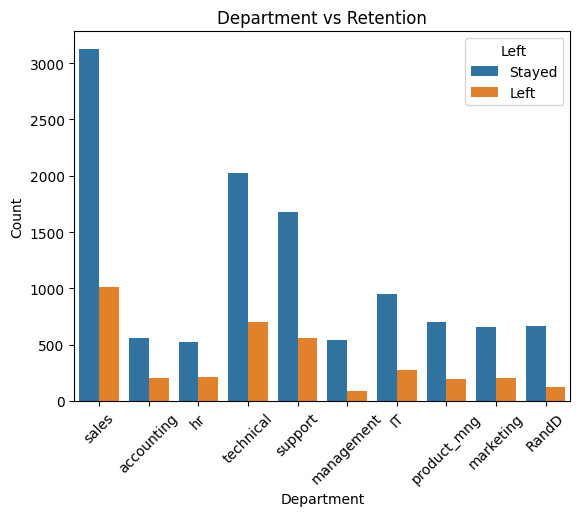

In [7]:
# Department vs Retention
sns.countplot(x='Department', hue='left', data=df)
plt.title("Department vs Retention")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

Q4.Logistic regression model

Variables that were narrowed down last_evaluation,	number_project,	average_montly_hours,	time_spend_company

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep (1).csv


In [10]:
df = pd.read_csv(list(uploaded.keys())[0])

In [11]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
df.shape

(14999, 10)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[['last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company']], df.left , train_size = 0.8)

In [15]:
X_train

,last_evaluation,number_project,average_montly_hours,time_spend_company
3570,0.60,3,270,3
4704,0.76,3,134,2
14899,0.81,7,244,5
5946,0.84,4,200,2
5792,0.68,6,154,5
...,...,...,...,...
297,0.52,2,147,3
6900,0.74,4,222,2
12288,0.91,5,232,5
13890,0.87,3,223,7


In [16]:
X_test

,last_evaluation,number_project,average_montly_hours,time_spend_company
4466,0.95,5,254,2
9472,0.86,3,173,3
14217,0.77,6,247,4
10399,0.54,5,203,2
2593,0.90,3,256,4
...,...,...,...,...
6837,0.97,5,145,2
2225,0.51,3,234,3
12537,0.45,2,154,3
13478,0.62,3,110,3


In [17]:
y_train

,left
3570,0
4704,0
14899,1
5946,0
5792,0
...,...
297,1
6900,0
12288,1
13890,0


In [18]:
y_test

,left
4466,0
9472,0
14217,1
10399,0
2593,0
...,...
6837,0
2225,0
12537,1
13478,0


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
model.fit(X_train, y_train)
#TRAINING THE DATA WITH THIS FXN

LogisticRegression()

In [21]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
model.score(X_test, y_test)

0.7486666666666667

In [23]:
model.predict_proba(X_test)

array([[0.81276979, 0.18723021],
       [0.80710196, 0.19289804],
       [0.7347043 , 0.2652957 ],
       ...,
       [0.78539183, 0.21460817],
       [0.82615383, 0.17384617],
       [0.70731436, 0.29268564]])

Q5. Measure the accuracy of the model

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 74.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      2287
           1       0.00      0.00      0.00       713

    accuracy                           0.75      3000
   macro avg       0.38      0.49      0.43      3000
weighted avg       0.58      0.75      0.65      3000



GRADIENT DESCENT WITH MACHINE LEARNUNG : ASSIGNMENT 2

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
from google.colab import files
uploaded = files.upload()

Saving insurance_data (1).csv to insurance_data (1).csv


In [29]:
df = pd.read_csv(list(uploaded.keys())[0])

In [30]:
df

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [31]:
df.shape

(28, 3)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'affordibility']], df.bought_insurance, train_size = 0.8)

In [34]:
X_train

,age,affordibility
23,45,1
3,52,0
26,23,1
10,18,1
12,27,0
20,21,1
0,22,1
9,61,1
16,25,0
6,55,0


In [35]:
X_test

,age,affordibility
2,47,1
27,46,1
4,46,1
8,62,1
15,55,1
25,54,1


In [36]:
y_train

,bought_insurance
23,1
3,0
26,0
10,0
12,0
20,0
0,0
9,1
16,1
6,0


In [37]:
y_test

,bought_insurance
2,1
27,0
4,1
8,1
15,1
25,1


In [38]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [39]:
# Add intercept term (bias) to the data (for gradient descent calculations)
X_train_scaled['intercept'] = 1
X_test_scaled['intercept'] = 1

In [40]:
# Convert data to numpy arrays for easier manipulation
X_train = X_train_scaled[['intercept', 'age', 'affordibility']].values
y_train = y_train.values
X_test = X_test_scaled[['intercept', 'age', 'affordibility']].values
y_test = y_test.values

In [41]:
# Initialize weights (random small values)
weights = np.zeros(X_train.shape[1])


In [42]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [43]:
# Define the cost function (binary cross-entropy)
def cost_function(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

In [44]:
# Gradient descent function
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        # Calculate the predictions
        predictions = sigmoid(np.dot(X, weights))

        # Compute the gradient
        gradients = (1/m) * np.dot(X.T, (predictions - y))

        # Update the weights
        weights -= learning_rate * gradients

        # Record the cost every 100 epochs (for visualization)
        if epoch % 100 == 0:
            cost_history.append(cost_function(X, y, weights))

    return weights, cost_history

In [48]:
# Set hyperparameters for gradient descent
learning_rate = 0.01
epochs = 5000

In [49]:
# Perform gradient descent to find the optimal weights
weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

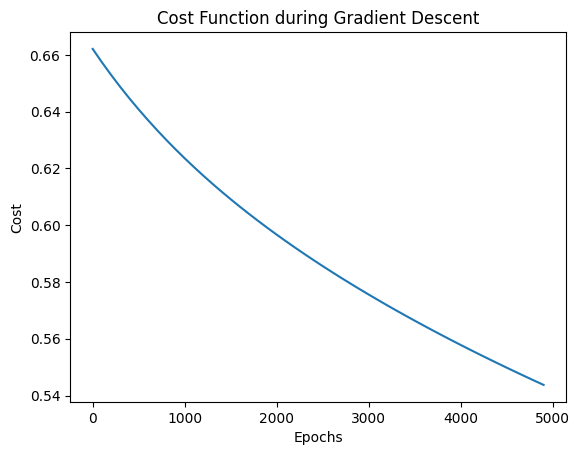

In [50]:
# Plot the cost function over epochs to check convergence
plt.plot(range(0, epochs, 100), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function during Gradient Descent')
plt.show()


In [51]:
# Evaluate the model on the test set
def predict(X, weights):
    predictions = sigmoid(np.dot(X, weights))
    return [1 if i >= 0.5 else 0 for i in predictions]

In [52]:
# Make predictions on the test set
predictions = predict(X_test, weights)

In [53]:
# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.33%
